# 7 Statistics with NumPy
## 7_A Exercises
- np.sort
- np.histogram()        | bins=, range=(,)
- np.histogram2d()      |
- np.histogramdd()
- array.flat
- NAN equiv functions

#### numpy.nanmean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)
- Compute the arithmetic mean along the specified axis, ignoring NaNs.
- Returns the average of the array elements. The average is taken over the flattened array by default, otherwise over the specified axis. float64 intermediate and return values are used for integer inputs.
- For all-NaN slices, NaN is returned and a RuntimeWarning is raised.

#### NAN-equiv functs. are useful when we have incomplete data.
- They run while ignoring all NAN values in the data.
- It would be in our best interest to find and fill any missing values, if we have the chance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'1.26.4'

In [2]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [3]:
# Function make a real density matrix

def real_dm(dm: np.ndarray) -> np.ndarray:
    return np.array(list(map(lambda row: row[::-1], dm))).T

def real_dm_b(dm: np.ndarray) -> np.ndarray:
    nf_arr = np.ones_like(dm)
    for ix in range(dm.shape[0]):
        nf_arr[ix] = dm[ix][::-1]
    return nf_arr.T

### dm_real = np.array(list(map(lambda row: row[::-1], dm))).T


In [4]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])
display(A)
print(show_attr('A'))

B = np.array([[1,0,0,3,1],
              [3,6,np.nan,2,9],
              [4,5,3,8,0]])
display(B)
print(show_attr('B'))


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

 A: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[ 1.,  0.,  0.,  3.,  1.],
       [ 3.,  6., nan,  2.,  9.],
       [ 4.,  5.,  3.,  8.,  0.]])

 B: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: float64 


In [5]:
# np.nanmean() vs np.mean() in a non-nan array
display(np.isnan(np.sum(A)))

print(np.nanmean(A), ' - ', np.nanmean(A, axis=0))
print(np.mean(A), ' - ', np.mean(A, axis=0))

False

3.4  -  [2.66666667 3.66666667 3.         4.33333333 3.33333333]
3.4  -  [2.66666667 3.66666667 3.         4.33333333 3.33333333]


In [6]:
# np.nanmean() vs np.mean() in an array with NANs
display(np.isnan(np.sum(B)))

print(np.nanmean(B), '\t- ', np.nanmean(B, axis=0))
print(np.mean(B), '\t\t\t- ', np.mean(B, axis=0))

# np.mean() does not provide any numeric value when facing incomplete data
# Only provides NAN (propagate NANs)

True

3.2142857142857144 	-  [2.66666667 3.66666667 1.5        4.33333333 3.33333333]
nan 			-  [2.66666667 3.66666667        nan 4.33333333 3.33333333]


In [7]:
# .qunatile() case
display(np.quantile(B, 0.7))
display(np.nanquantile(B, 0.7))

nan

4.1

In [8]:
# or Variance
display(np.var(B))
display(np.nanvar(B))

nan

7.882653061224489

In [9]:
h2d = np.histogram2d(B[0], B[1], bins=4)
display(h2d)
real_dm(h2d[0])

ValueError: autodetected range of [nan, nan] is not finite

In [84]:
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

<Axes: >

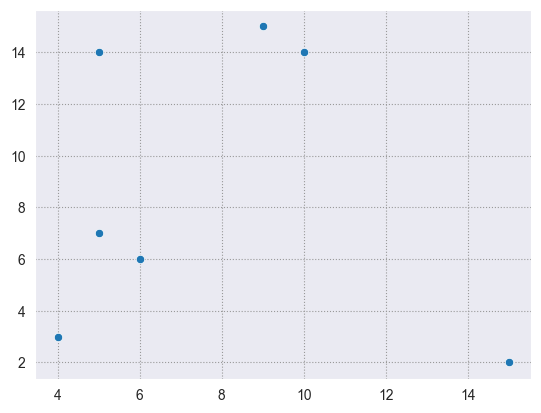

In [85]:
sns.scatterplot(x=B[0], y=B[1])

<Axes: >

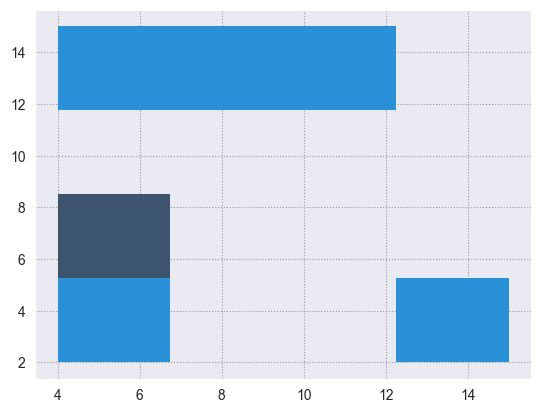

In [86]:
sns.histplot(x=B[0], y=B[1])